## Fertilizer Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### Importing the Dataset

In [2]:
df = pd.read_csv("./Fertilizer Prediction.csv")
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [3]:
df.size

891

In [4]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [6]:
df.apply(lambda a: len(a.unique()))

Temparature        14
Humidity           13
Moisture           41
Soil Type           5
Crop Type          11
Nitrogen           24
Potassium          13
Phosphorous        32
Fertilizer Name     7
dtype: int64

### Preprocessing the Dataset

In [7]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [8]:
categoryCol = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categoryCol.append(i)
categoryCol

['Soil Type', 'Crop Type', 'Fertilizer Name']

In [9]:
for c in categoryCol:
    print(c)
    print(df[c].value_counts())

Soil Type
Loamy     21
Sandy     20
Clayey    20
Black     19
Red       19
Name: Soil Type, dtype: int64
Crop Type
Sugarcane      13
Cotton         12
Millets        11
Paddy          10
Pulses         10
Wheat           9
Tobacco         7
Barley          7
Oil seeds       7
Ground Nuts     7
Maize           6
Name: Crop Type, dtype: int64
Fertilizer Name
Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: Fertilizer Name, dtype: int64


### Exploratory Data Analysis

<AxesSubplot:xlabel='Soil Type', ylabel='count'>

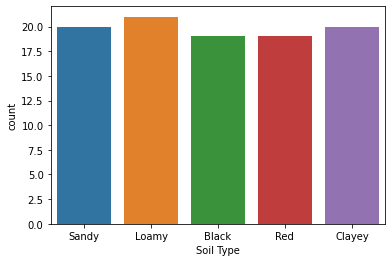

In [10]:
sns.countplot(df['Soil Type'])

<AxesSubplot:xlabel='Crop Type', ylabel='count'>

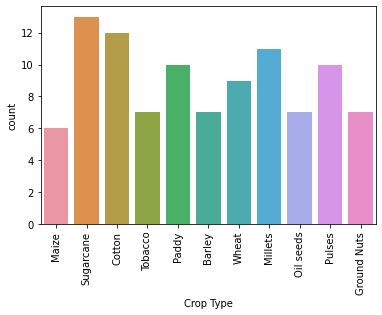

In [11]:
plt.xticks(rotation=90)
sns.countplot(df['Crop Type'])

<AxesSubplot:xlabel='Fertilizer Name', ylabel='count'>

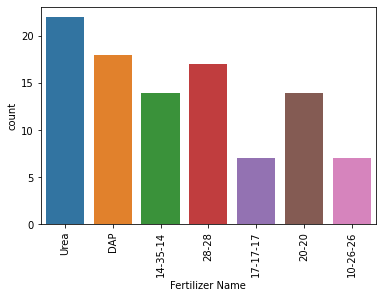

In [12]:
plt.xticks(rotation=90)
sns.countplot(df['Fertilizer Name'])

<AxesSubplot:xlabel='Crop Type', ylabel='Temparature'>

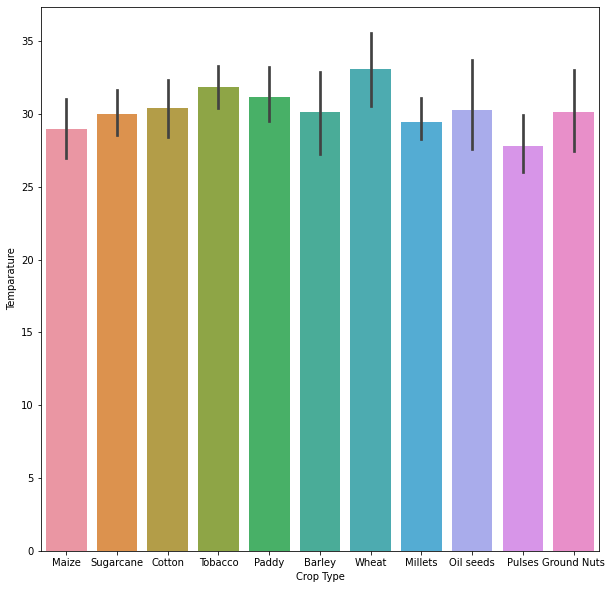

In [13]:
plt.figure(figsize=(10,10))
sns.barplot(df['Crop Type'], df['Temparature'])

<AxesSubplot:xlabel='Crop Type', ylabel='Humidity '>

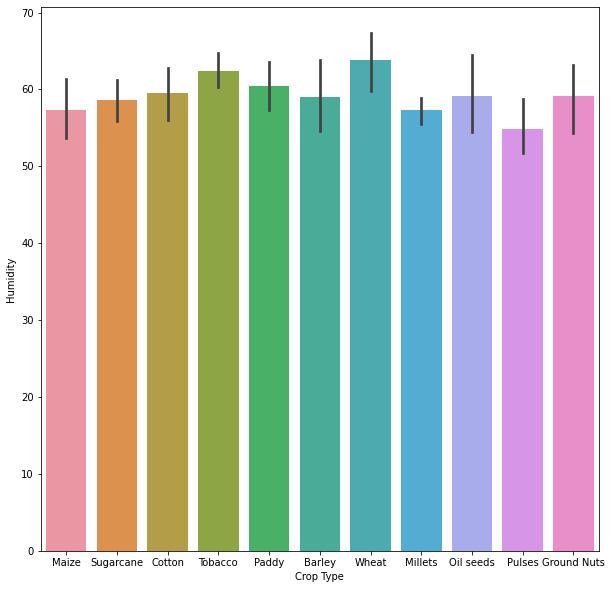

In [14]:
plt.figure(figsize=(10,10))
sns.barplot(df['Crop Type'], df['Humidity '])

<AxesSubplot:xlabel='Soil Type', ylabel='Moisture'>

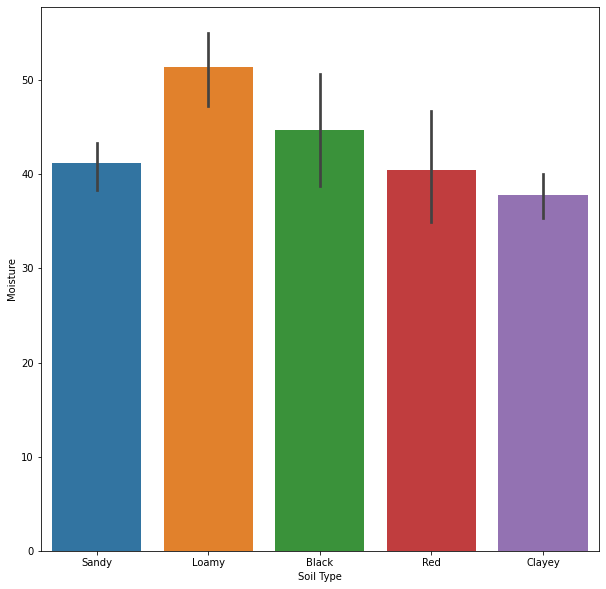

In [15]:
plt.figure(figsize=(10,10))
sns.barplot(df['Soil Type'], df['Moisture'])

<AxesSubplot:xlabel='Fertilizer Name', ylabel='Nitrogen'>

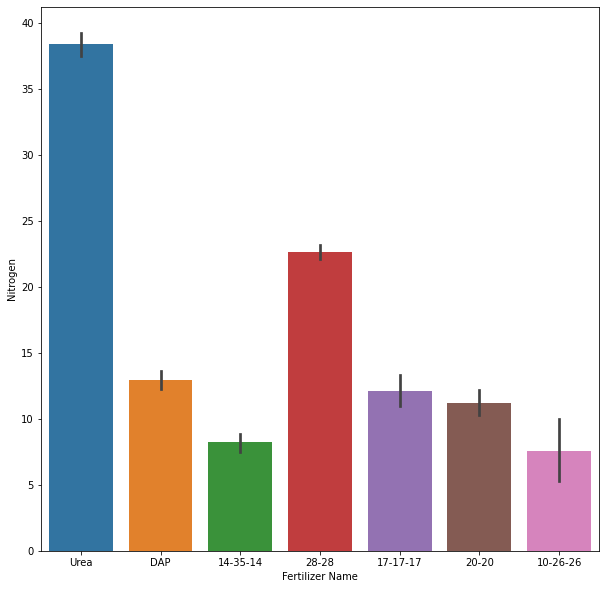

In [16]:
plt.figure(figsize=(10,10))
sns.barplot(df['Fertilizer Name'], df['Nitrogen'])

<AxesSubplot:xlabel='Fertilizer Name', ylabel='Potassium'>

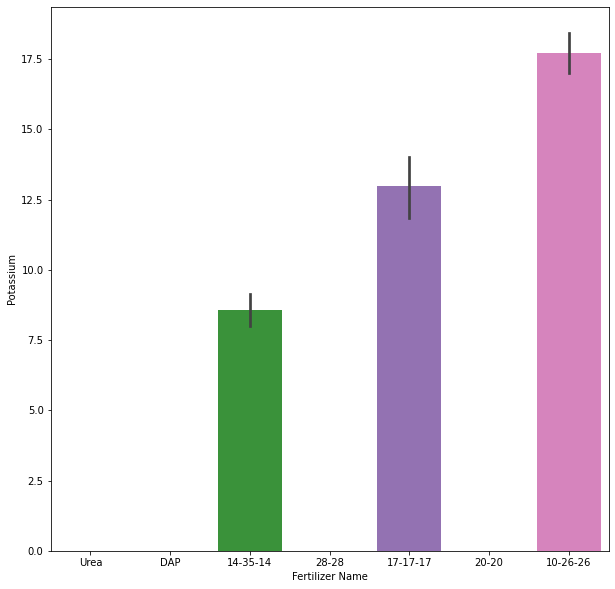

In [17]:
plt.figure(figsize=(10,10))
sns.barplot(df['Fertilizer Name'], df['Potassium'])

<AxesSubplot:xlabel='Fertilizer Name', ylabel='Phosphorous'>

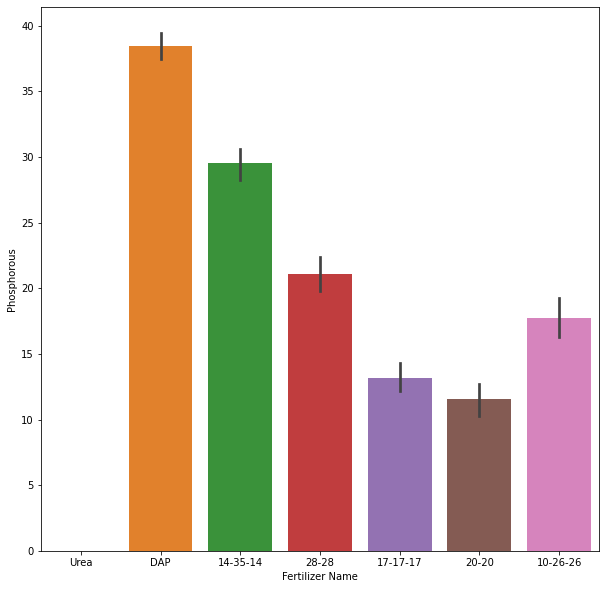

In [18]:
plt.figure(figsize=(10,10))
sns.barplot(df['Fertilizer Name'], df['Phosphorous'])

In [19]:
def plotContinuous(x):
    figure, axis = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True)
    axis[0].set_title('Distribution')
    sns.distplot(x,ax=axis[0])
    axis[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axis[1])
    axis[2].set_title('Relation with Output Variable')
    sns.boxplot(y = x,x = df['Fertilizer Name'])
    
def plotCatobar(x):
    figure, axis = plt.subplots(nrows=1,ncols=2,figsize=(15,10),tight_layout=True)
    axis[0].set_title('Count Plot')
    sns.countplot(x,ax=axis[0])
    axis[1].set_title('Relation with Output Variable')
    sns.countplot(x = x,hue = df['Fertilizer Name'], ax=axis[1])

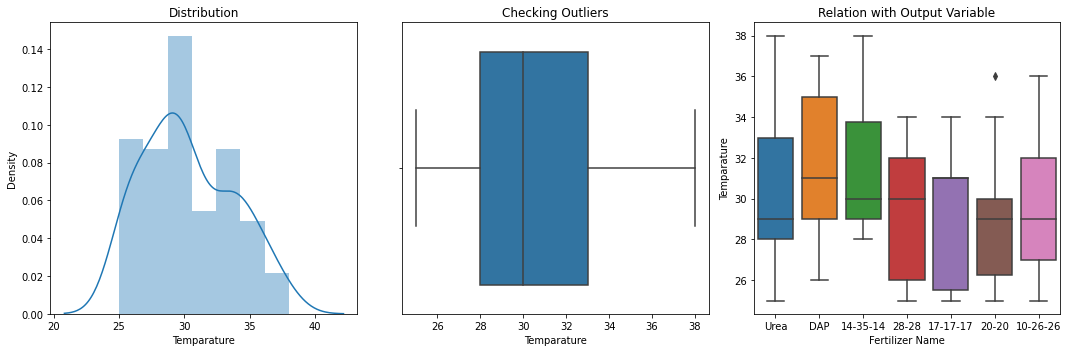

In [20]:
plotContinuous(df['Temparature'])

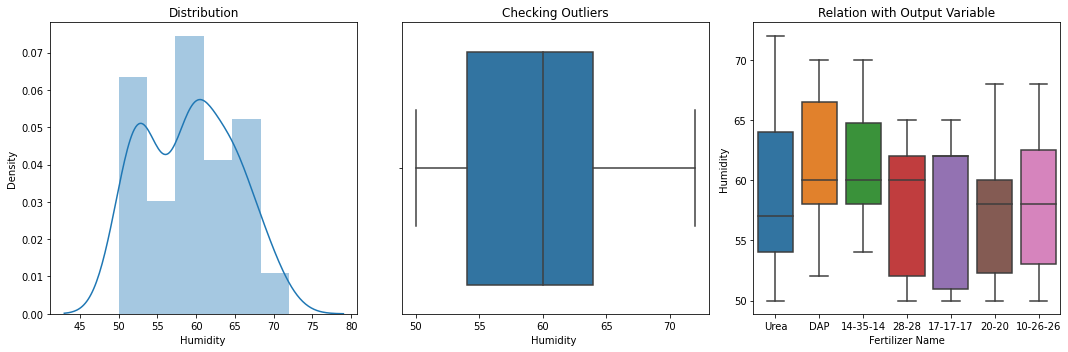

In [21]:
plotContinuous(df['Humidity '])

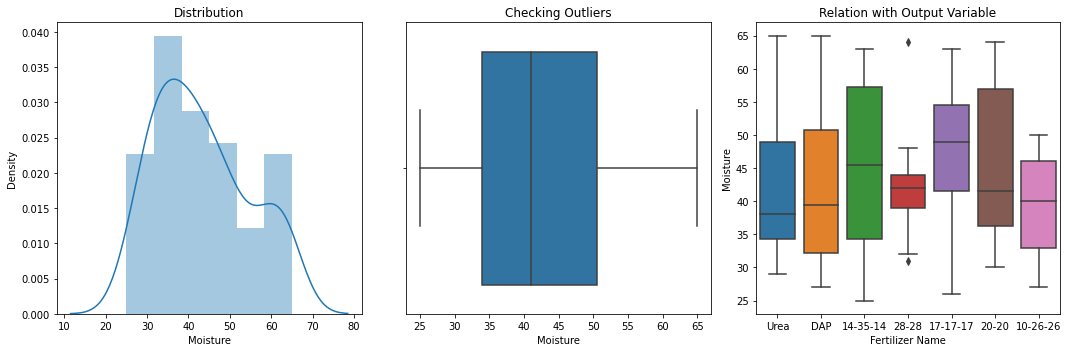

In [22]:
plotContinuous(df['Moisture'])

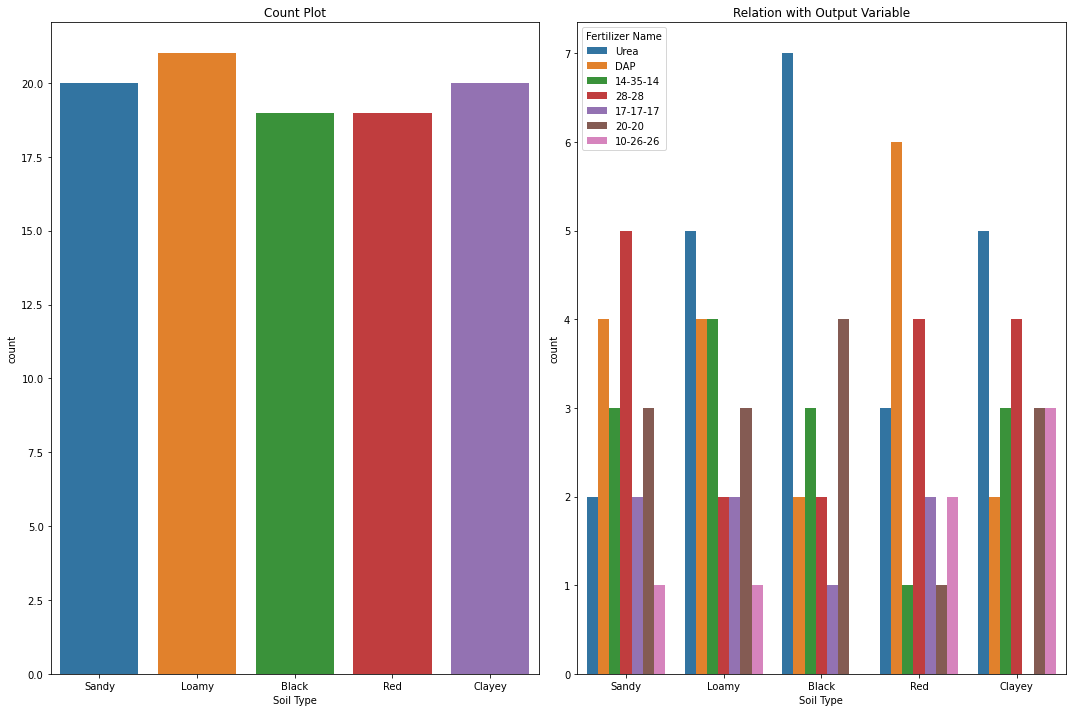

In [23]:
plotCatobar(df['Soil Type'])

<AxesSubplot:xlabel='Soil Type', ylabel='Temparature'>

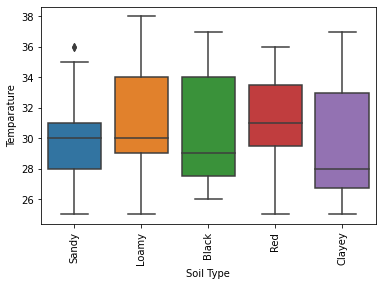

In [24]:
plt.xticks(rotation=90)
sns.boxplot(x=df['Soil Type'],y=df['Temparature'])

<AxesSubplot:xlabel='Soil Type', ylabel='Temparature'>

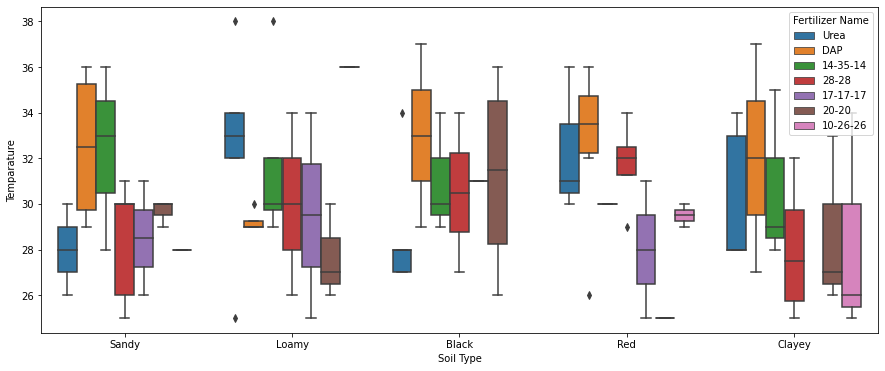

In [25]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['Soil Type'],y=df['Temparature'],hue=df['Fertilizer Name'])

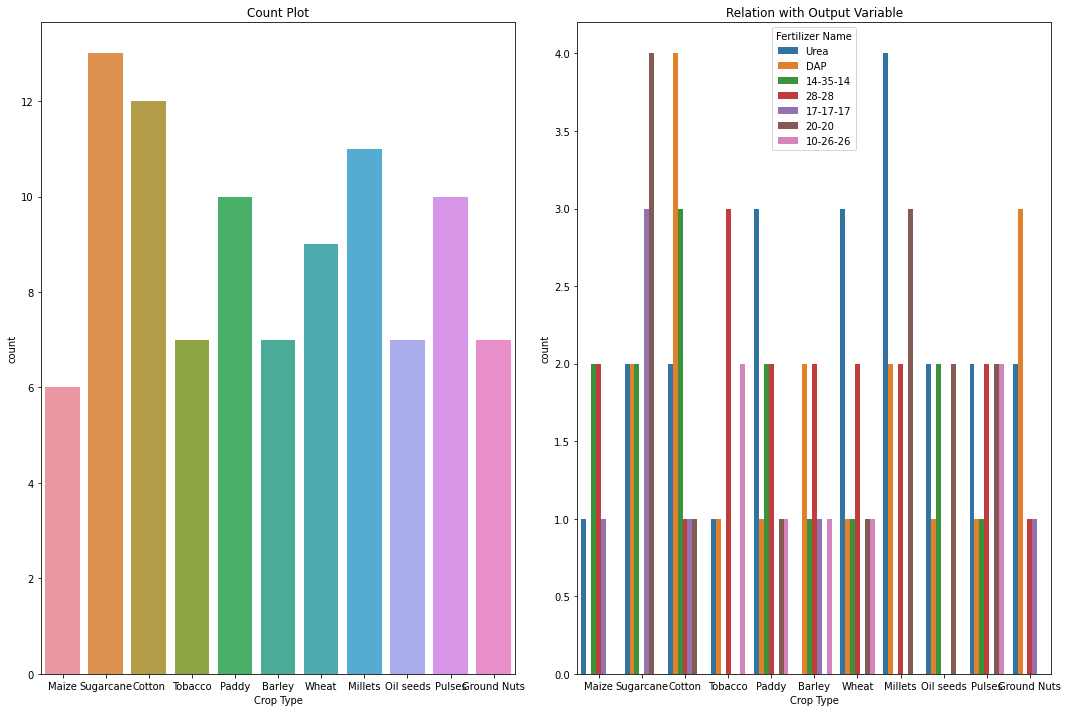

In [26]:
plotCatobar(df['Crop Type'])

<AxesSubplot:xlabel='Crop Type', ylabel='Temparature'>

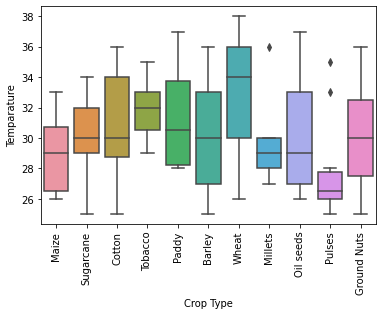

In [27]:
plt.xticks(rotation=90)
sns.boxplot(x=df['Crop Type'],y=df['Temparature'])

<AxesSubplot:xlabel='Crop Type', ylabel='Humidity '>

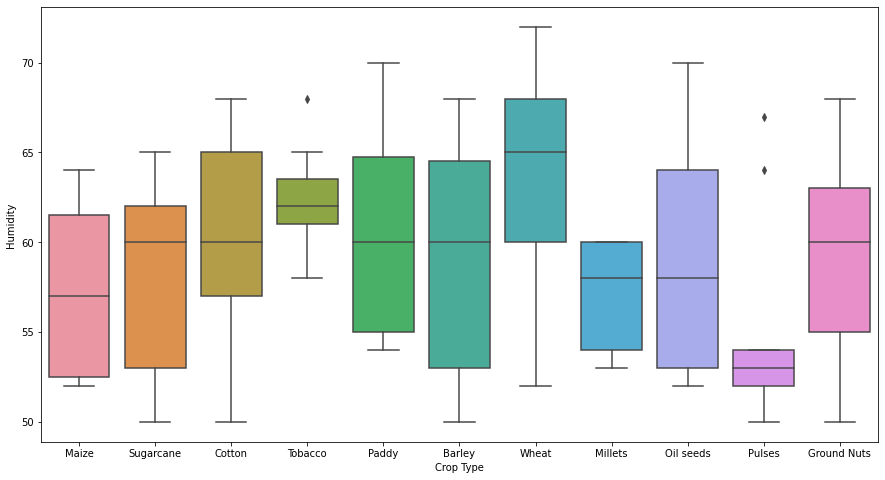

In [28]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df['Crop Type'],y=df['Humidity '])

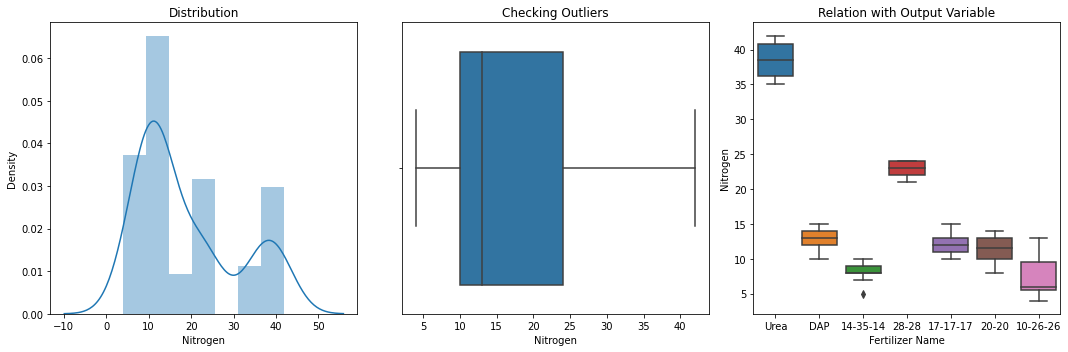

In [29]:
plotContinuous(df['Nitrogen'])

<AxesSubplot:xlabel='Crop Type', ylabel='Nitrogen'>

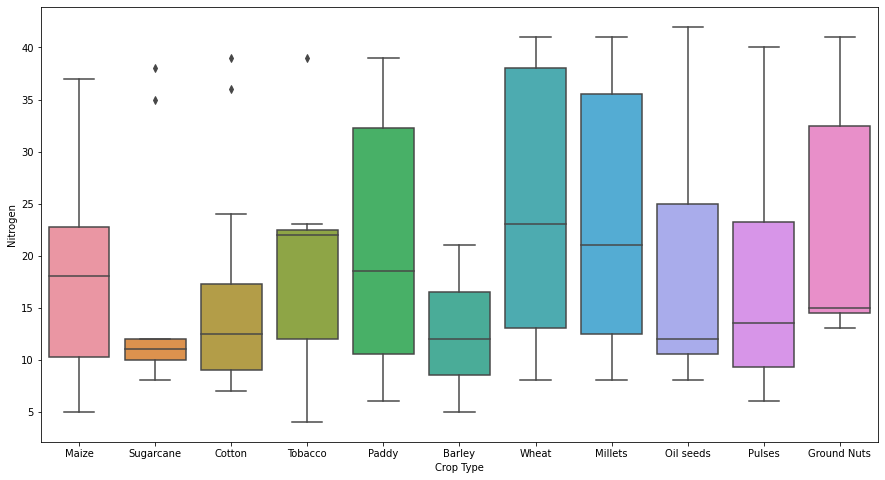

In [30]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df['Crop Type'],y=df['Nitrogen'])

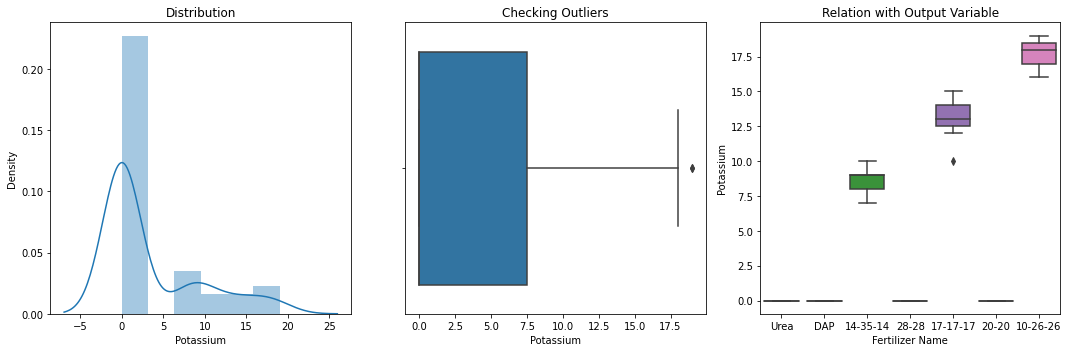

In [31]:
plotContinuous(df['Potassium'])

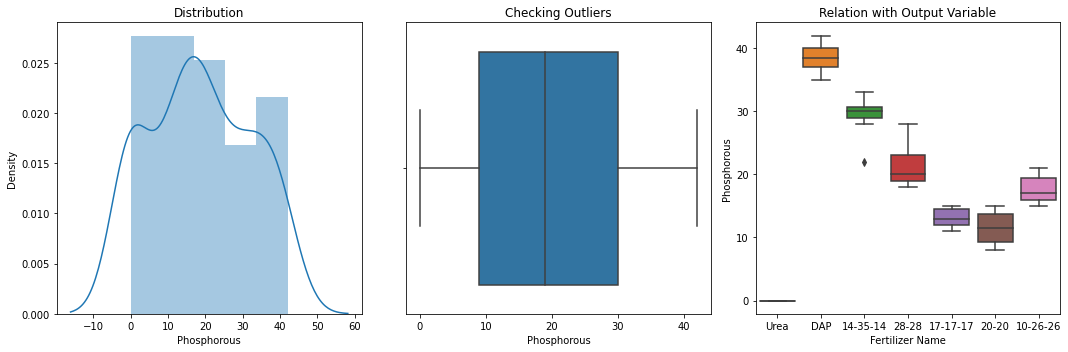

In [32]:
plotContinuous(df['Phosphorous'])

## Correlation Matrix

<AxesSubplot:>

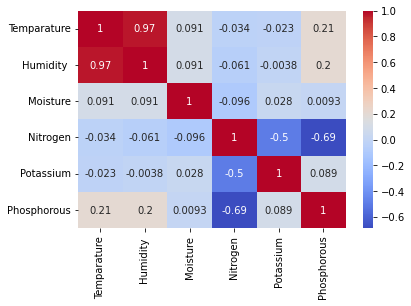

In [33]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

### Input split

In [34]:
print(sum(df['Potassium'] == 0))
X = df.drop(columns = ['Fertilizer Name'], axis=1)
Y = df['Fertilizer Name']

71


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


### Encoding Categorical Data

* Independent Variable
  - OneHotEncoder

* Dependent Variable
  - LebelEncoder

In [36]:
from sklearn.preprocessing import LabelEncoder

X = df.drop(columns = ['Fertilizer Name', 'Soil Type', 'Crop Type'], axis=1).values
Y = df['Fertilizer Name']
Le=LabelEncoder()
for i in range(len(X[0])):
    X[:,i]=Le.fit_transform(X[:,i])

In [37]:
X.shape

(99, 6)

### Splitting the dataset into the Training set and Test set

In [38]:
from sklearn.model_selection import train_test_split
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [39]:
accuracy = []
model = []

### Training the Model on the Training set

## Model 1: K - Nearest Neighbors

In [40]:
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(XTrain, yTrain)

# Predicting the Test set results
yPredict = knn.predict(XTest)

"""
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(yTest, yPredict)
print(cm)
"""

acc = metrics.accuracy_score(yTest, yPredict)
accuracy.append(acc * 100)
model.append('K-Nearest Neighbors')
print("K-Nearest Neighbours's Accuracy :", acc * 100)

# Cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Cross-Validation Score:", score * 100)

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(yTest, yPredict))

K-Nearest Neighbours's Accuracy : 80.0
Cross-Validation Score: [90.         75.         80.         65.         57.89473684]
              precision    recall  f1-score   support

    10-26-26       1.00      0.67      0.80         3
    14-35-14       1.00      0.50      0.67         4
    17-17-17       0.00      0.00      0.00         1
       20-20       0.33      1.00      0.50         1
       28-28       0.83      1.00      0.91         5
         DAP       0.67      1.00      0.80         2
        Urea       1.00      1.00      1.00         4

    accuracy                           0.80        20
   macro avg       0.69      0.74      0.67        20
weighted avg       0.84      0.80      0.79        20



In [41]:
"""
import pickle

knnPKLFilename = 'knnClassifier.pkl'
knnModelPKL = open(knnPKLFilename, 'wb')
pickle.dump(knn, knnModelPKL)
knnModelPKL.close()
"""

"\nimport pickle\n\nknnPKLFilename = 'knnClassifier.pkl'\nknnModelPKL = open(knnPKLFilename, 'wb')\npickle.dump(knn, knnModelPKL)\nknnModelPKL.close()\n"

## Model 2: Kernel SVM

In [42]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 0)
svm.fit(XTrain, yTrain)

yPredict = svm.predict(XTest)

"""
# Making the Confusion Matrix and Calculating the Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
confusionMat = confusion_matrix(yTest, yPredict)
print(confusionMat)
"""
acc = metrics.accuracy_score(yTest, yPredict)
accuracy.append(acc * 100)
model.append('Kernel SVM')
print("Kernel SVM's Accuracy :", acc * 100)

from sklearn.model_selection import cross_val_score
score = cross_val_score(svm, X, Y, cv=5)
print("Cross-Validation Score:", score * 100)

from sklearn.metrics import classification_report
print(classification_report(yTest, yPredict))

Kernel SVM's Accuracy : 90.0
Cross-Validation Score: [95.         80.         90.         85.         84.21052632]
              precision    recall  f1-score   support

    10-26-26       1.00      0.67      0.80         3
    14-35-14       1.00      1.00      1.00         4
    17-17-17       0.00      0.00      0.00         1
       20-20       0.33      1.00      0.50         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         2
        Urea       1.00      1.00      1.00         4

    accuracy                           0.90        20
   macro avg       0.76      0.81      0.76        20
weighted avg       0.92      0.90      0.89        20



In [43]:
"""
import pickle

svmPKLFilename = 'svmClassifier.pkl'
svmModelPKL = open(svmPKLFilename, 'wb')
pickle.dump(svm, svmModelPKL)
svmModelPKL.close()
"""

"\nimport pickle\n\nsvmPKLFilename = 'svmClassifier.pkl'\nsvmModelPKL = open(svmPKLFilename, 'wb')\npickle.dump(svm, svmModelPKL)\nsvmModelPKL.close()\n"

## Model 3: Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(XTrain, yTrain)

yPredict = gnb.predict(XTest)

"""
# Making the Confusion Matrix and Calculating the Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
"""

acc = metrics.accuracy_score(yTest, yPredict)
accuracy.append(acc * 100)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy :", acc * 100)

from sklearn.model_selection import cross_val_score
score = cross_val_score(gnb, X, Y, cv=5)
print("Cross-Validation Score:", score * 100)

from sklearn.metrics import classification_report
print(classification_report(yTest, yPredict))

Naive Bayes's Accuracy : 100.0
Cross-Validation Score: [100. 100. 100. 100. 100.]
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         3
    14-35-14       1.00      1.00      1.00         4
    17-17-17       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         2
        Urea       1.00      1.00      1.00         4

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [45]:
"""
import pickle

gnbPKLFilename = 'gnbClassifier.pkl'
gnbModelPKL = open(gnbPKLFilename, 'wb')
pickle.dump(gnb, gnbModelPKL)
gnbModelPKL.close()
"""

"\nimport pickle\n\ngnbPKLFilename = 'gnbClassifier.pkl'\ngnbModelPKL = open(gnbPKLFilename, 'wb')\npickle.dump(gnb, gnbModelPKL)\ngnbModelPKL.close()\n"

## Model 4: Decision Tree Classification

In [46]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtc.fit(XTrain, yTrain)

yPredict = dtc.predict(XTest)

"""
# Making the Confusion Matrix and Calculating the Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
"""

acc = metrics.accuracy_score(yTest, yPredict)
accuracy.append(acc * 100)
model.append('Decision Tree Classifier')
print("Decision Tree Classifier's Accuracy :", acc * 100)

from sklearn.model_selection import cross_val_score
score = cross_val_score(dtc, X, Y, cv=5)
print("Cross-Validation Score:", score * 100)

from sklearn.metrics import classification_report
print(classification_report(yTest, yPredict))

Decision Tree Classifier's Accuracy : 90.0
Cross-Validation Score: [ 95. 100.  95.  95. 100.]
              precision    recall  f1-score   support

    10-26-26       0.67      0.67      0.67         3
    14-35-14       1.00      0.75      0.86         4
    17-17-17       0.50      1.00      0.67         1
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         2
        Urea       1.00      1.00      1.00         4

    accuracy                           0.90        20
   macro avg       0.88      0.92      0.88        20
weighted avg       0.93      0.90      0.90        20



In [47]:
"""
import pickle

dtcPKLFilename = 'dtcClassifier.pkl'
dtcModelPKL = open(dtcPKLFilename, 'wb')
pickle.dump(dtc, dtcModelPKL)
dtcModelPKL.close()
"""

"\nimport pickle\n\ndtcPKLFilename = 'dtcClassifier.pkl'\ndtcModelPKL = open(dtcPKLFilename, 'wb')\npickle.dump(dtc, dtcModelPKL)\ndtcModelPKL.close()\n"

## Model 5: Random Forest Classification

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 100, criterion = 'gini' , random_state= 42)
rfc.fit(XTrain, yTrain)

yPredict = rfc.predict(XTest)

"""
# Making the Confusion Matrix and Calculating the Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
"""

acc = metrics.accuracy_score(yTest, yPredict)
accuracy.append(acc * 100)
model.append('Random Forest Classifier')
print("Random Forest Classifier's Accuracy:", acc * 100)

from sklearn.model_selection import cross_val_score
score = cross_val_score(rfc, X, Y, cv=5)
print("Cross-Validation Score:", score * 100)

from sklearn.metrics import classification_report
print(classification_report(yTest, yPredict))

Random Forest Classifier's Accuracy: 100.0
Cross-Validation Score: [100. 100. 100.  95. 100.]
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         3
    14-35-14       1.00      1.00      1.00         4
    17-17-17       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         2
        Urea       1.00      1.00      1.00         4

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [49]:
"""
import pickle

rfcPKLFilename = 'rfcClassifier.pkl'
rfcModelPKL = open(rfcPKLFilename, 'wb')
pickle.dump(rfc, rfcModelPKL)
rfcModelPKL.close()
"""

"\nimport pickle\n\nrfcPKLFilename = 'rfcClassifier.pkl'\nrfcModelPKL = open(rfcPKLFilename, 'wb')\npickle.dump(rfc, rfcModelPKL)\nrfcModelPKL.close()\n"

## Model Accuracy

In [50]:
for i in range(len(accuracy)):
    print(model[i], '-->', accuracy[i])

K-Nearest Neighbors --> 80.0
Kernel SVM --> 90.0
Naive Bayes --> 100.0
Decision Tree Classifier --> 90.0
Random Forest Classifier --> 100.0


<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

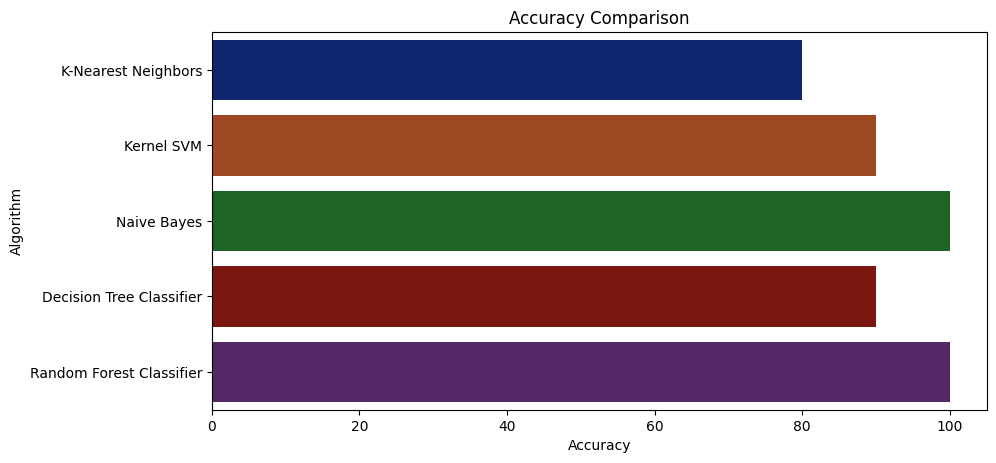

In [51]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = accuracy, y = model, palette ='dark')

# Making a prediction

In [52]:
data = np.array([[26, 52, 30, 37, 15, 30]])
prediction = knn.predict(data)
print(prediction)

['DAP']
